<a href="https://colab.research.google.com/github/CodeWithSridhar/Internship_The-Sparks-Foundation/blob/main/Task1_Score_Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Problem Statement***

Prediction using Supervised ML

● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?




In [ ]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the dataset

In [ ]:
data= pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Checking dataset columns

In [ ]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Checking null values in the dataset
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


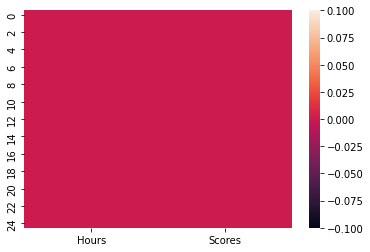

In [ ]:
# Visualization for missing values
sns.heatmap(data.isnull())

Visualization

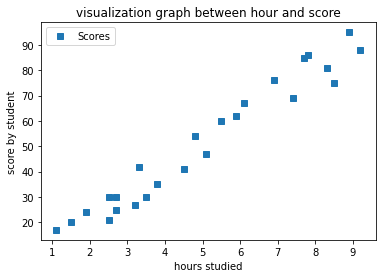

In [ ]:
data.plot(x='Hours',y='Scores',style='s')
plt.title('visualization graph between hour and score')
plt.xlabel('hours studied')
plt.ylabel('score by student')
plt.show()

Preparing the data

In [ ]:
# The next step is to divide the data into "attributes" (inputs) and "labels" (outputs). 
X= data.iloc[:,:-1].values
y= data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

# Model Training

We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [ ]:
# Training the algorithm
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Intercept :",regressor.intercept_)
print("Coefficient :",regressor.coef_)

Intercept : 2.018160041434662
Coefficient : [9.91065648]


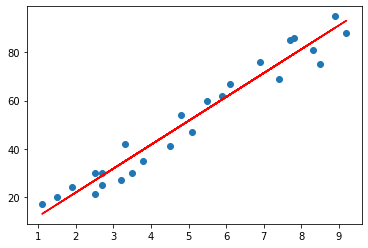

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line, c='r');
plt.show()

In [ ]:
y_pred = regressor.predict(X_test) # Predicting the scores
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [ ]:
y_test

array([20, 27, 69, 30, 62])

In [ ]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


 predicting score if a student studies for 9.25 hrs/ day

In [ ]:
# Testing with own data
hours = pd.DataFrame([[9.25]])
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours =       0
0  9.25
Predicted Score = 93.69173248737539


#Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
